# Introduction to nn classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X.shape

(1000, 2)

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


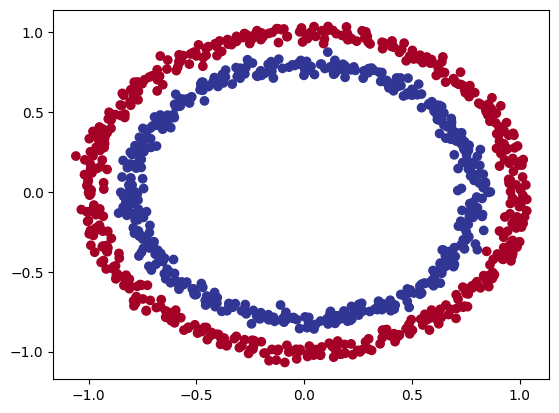

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [ ]:
# Check the shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TF:
1. Create or import a model
2. Compile
3. Fit
4. Evaluate
5. Tweak
6. Evaluate..

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)



Epoch 1/5
32/32 [==============================] - 2s 18ms/step - loss: 4.4607 - accuracy: 0.4640
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 5.7309 - accuracy: 0.5740
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 5.4675 - accuracy: 0.5860
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 5.2249 - accuracy: 0.5390
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 5.2570 - accuracy: 0.5450


In [ ]:
# Longer learning
model_1.fit(X, y, epochs=200, verbose=0)

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

Since we're working on binary classification problem and our model is getting 50% accuracy, we need to add an extra layer!

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"]
                )

model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# Evaluating the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5000


[0.6936790347099304, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving the model



In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6976 - accuracy: 0.5100


[0.6975913047790527, 0.5099999904632568]

Function to visualize our model's predictions.

In [ ]:
import numpy as np

def plt_decision_boundary(model, X, y):
  # Axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classification


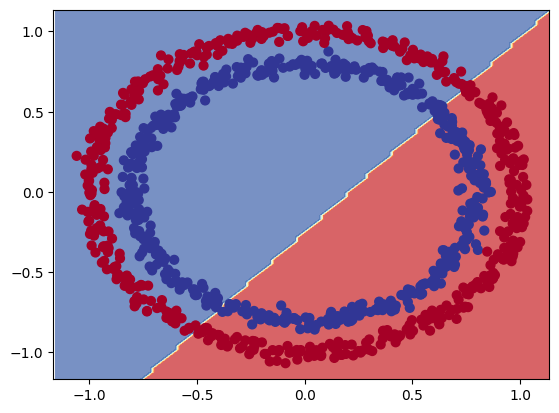

In [ ]:
plt_decision_boundary(model=model_3, X=X, y=y)

Let's change loss function!

In [ ]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

#Splitting our data into two sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 417.4554 - mae: 417.4554
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 312.8853 - mae: 312.8853
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 211.0635 - mae: 211.0635
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 103.7767 - mae: 103.7767
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 52.3468 - mae: 52.3468
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 81.8481 - mae: 81.8481
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 65.6529 - mae: 65.6529
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 43.3085 - mae: 43.3085
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 48.2430 - mae: 48.2430
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.4740 - mae: 41.4740
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 6ms/step


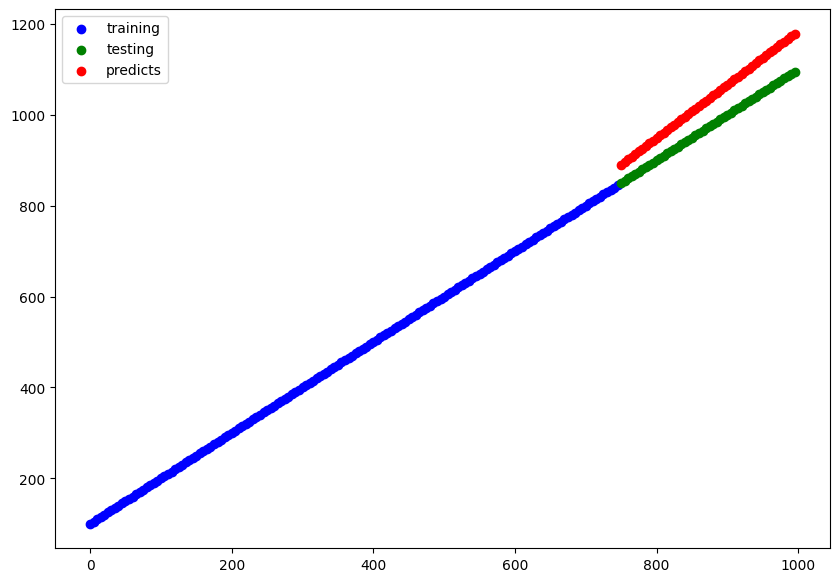

In [ ]:
# Make predictions with reg model

y_reg_preds = model_3.predict(X_reg_test)

# Plot
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="training")
plt.scatter(X_reg_test, y_reg_test, c="g", label="testing")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="predicts")
plt.legend()

## The missing piece: Non-linearity

In [ ]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")

])
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.5373 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2342 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0449 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7118 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1262 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8015 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2809 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.2316 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1973 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 1.1675 - accuracy: 0.5000
Epoch 11/

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])
history = model_6.fit(X,y,epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 0.6889 - accuracy: 0.5240
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5040
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.5220
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.6570
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.7600
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.8350
Epoch 7/150
32/32 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.9130
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.9540
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.9810
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.9830
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000


[0.0029660549480468035, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification


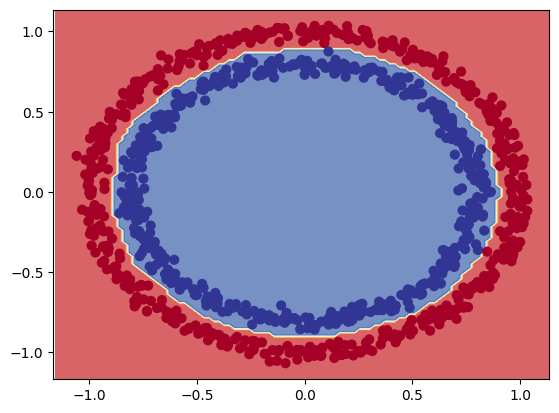

In [ ]:
plt_decision_boundary(model_6, X, y)

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

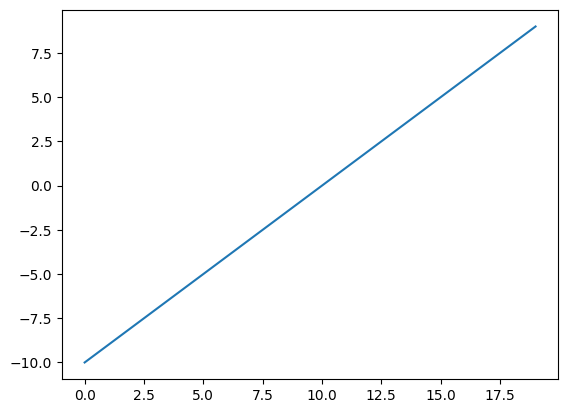

In [ ]:
# Visualize
plt.plot(A)

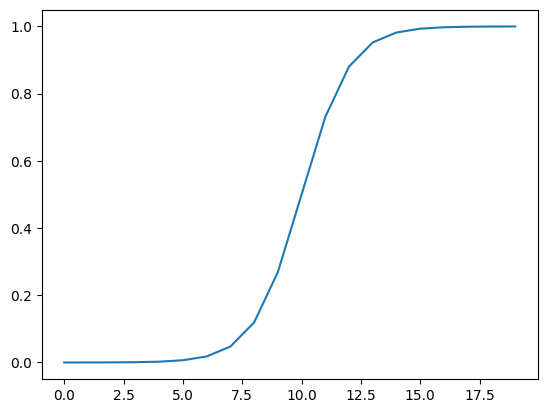

In [ ]:
# Let's start by replicating sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

plt.plot(sigmoid(A))

In [ ]:
# ReLu
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

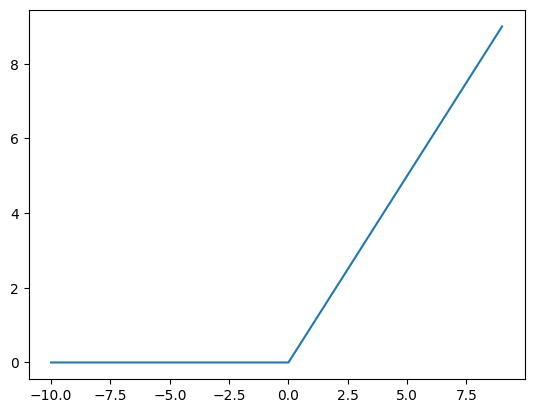

In [ ]:
plt.plot(A,relu(A))

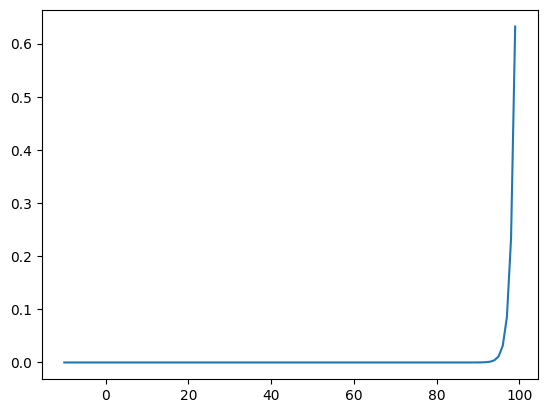

In [ ]:
B = tf.cast(tf.range(-10,100), tf.float32)
plt.plot(B, tf.math.softmax(B))

## Evaluating and improving our classification

We need **training** and **testing** dataset

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape

(800, 2)

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the test data
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6899 - accuracy: 0.5188
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.5500
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5500
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.5738
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.5825
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6647 - accuracy: 0.5850
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.5950
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.5962
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6398 - accuracy: 0.6525
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.6988
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8500


[0.3762345612049103, 0.8500000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


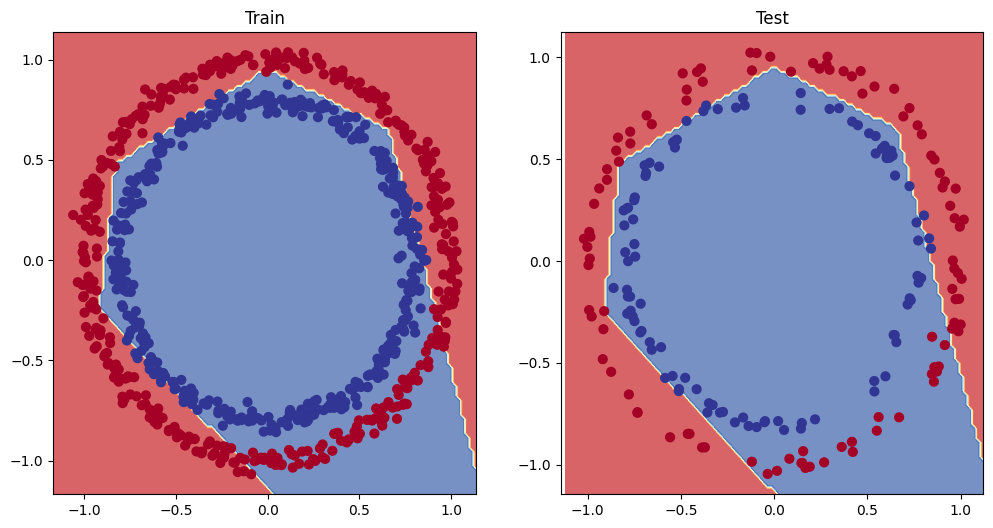

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plt_decision_boundary(model_8, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plt_decision_boundary(model_8, X_test, y_test)
plt.show()

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy
0,0.689902,0.51875
1,0.685282,0.55000
2,0.680713,0.55000
3,0.675951,0.57375
4,0.671384,0.58250
5,0.664669,0.58500
6,0.656703,0.59500
7,0.651476,0.59625
8,0.639755,0.65250
9,0.616694,0.69875


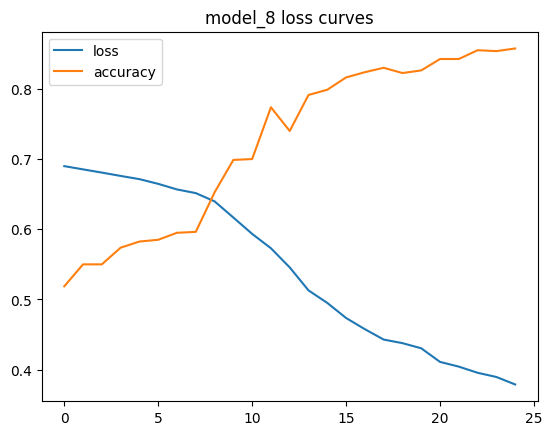

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curves");

## Finding the best learning rate

* A learning rate **callback**
* Another model (we could use the same one as above, but we're practicing building)
* A modified loss curves plot

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])
# Create a lr callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6979 - accuracy: 0.5125 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5063 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.4913 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4925 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4925 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

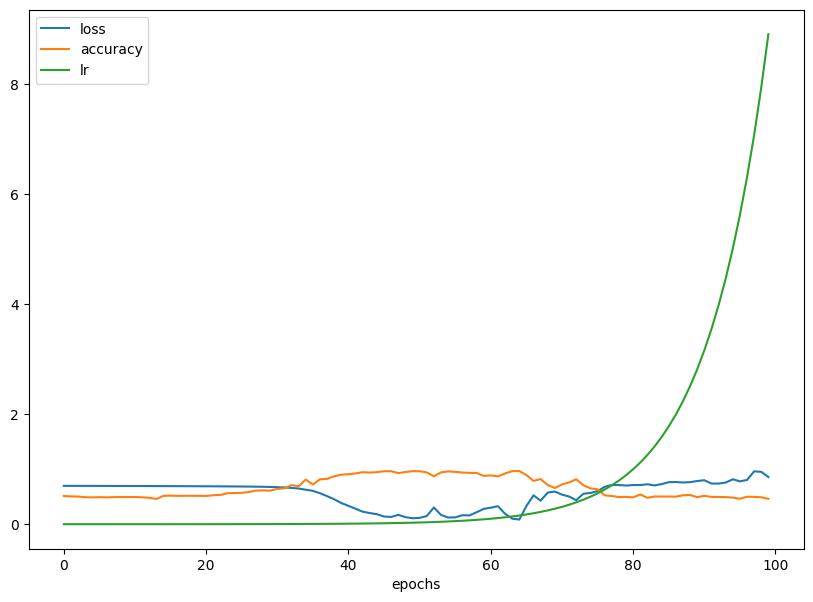

In [ ]:
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

In [ ]:
# Plot the lr vs the loss
lrs = 1e-4*10**(tf.range(100)/20)

In [ ]:
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning rate vs. Loss')

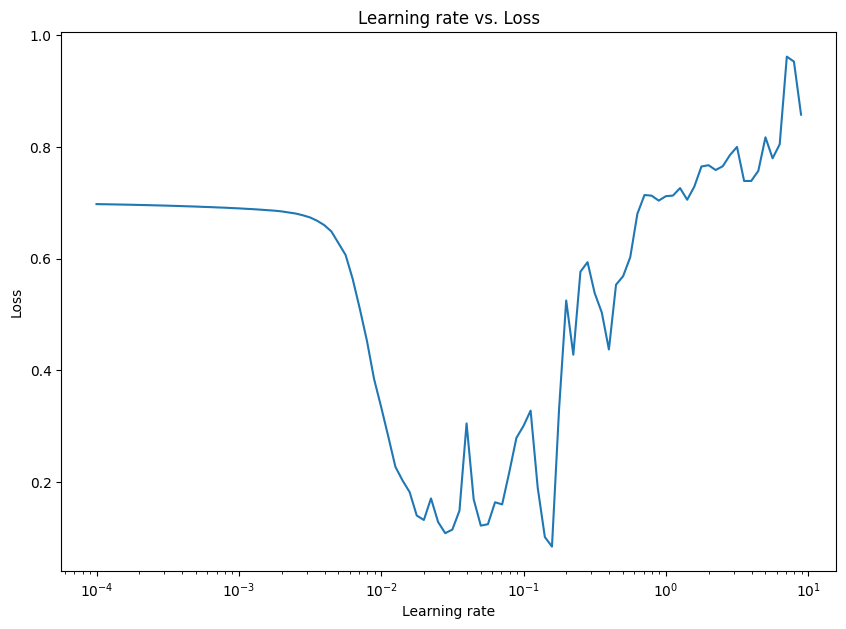

In [ ]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [ ]:
tf.random.set_seed(42)

model_12 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_12.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"])

history = model_12.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6937 - accuracy: 0.5188
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5688
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6650 - accuracy: 0.5725
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6488 - accuracy: 0.5913
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5975 - accuracy: 0.7200
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.8500
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8825
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2943 - accuracy: 0.9550
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.2190 - accuracy: 0.9712
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1566 - accuracy: 0.9887
Epoch 11/25
25/25 [

In [ ]:
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9900


[0.03061589039862156, 0.9900000095367432]

313/313 [==============================] - 2s 5ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


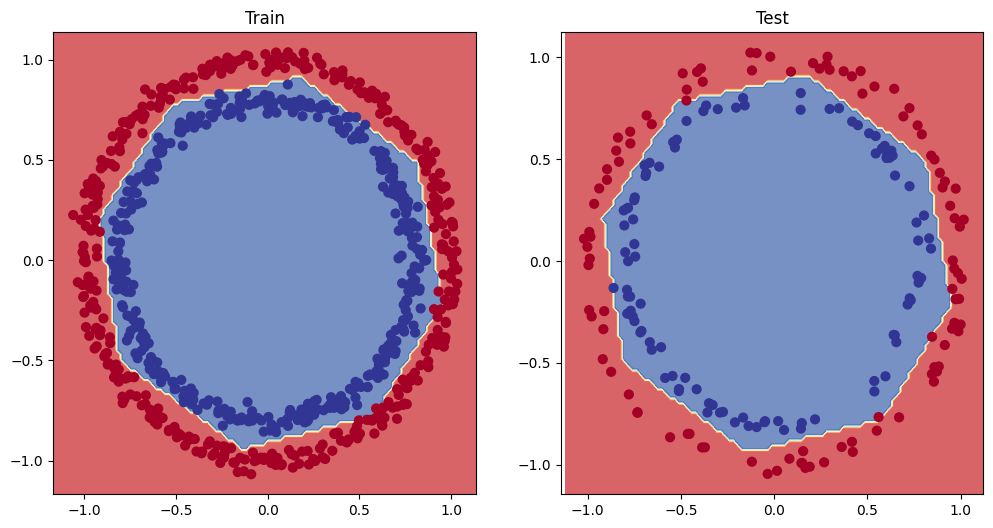

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plt_decision_boundary(model_12, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plt_decision_boundary(model_12, X_test, y_test)
plt.show()

## More classification evaluation methods
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report scikit-learn

In [ ]:
loss, accuracy = model_12.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 6ms/step - loss: 0.0306 - accuracy: 0.9900
Model loss on the test set: 0.03061589039862156
Model accuracy on the test set 99.00%


### How about a confusion matrix?

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_12.predict(X_test)



7/7 [==============================] - 0s 3ms/step


In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.9291289e-01],
       [9.9949974e-01],
       [9.5443434e-01],
       [9.9881709e-01],
       [9.8627377e-03],
       [3.1568201e-03],
       [9.2809278e-01],
       [7.2858580e-05],
       [9.9902964e-01],
       [8.5683540e-03]], dtype=float32)

Predictions are in **prediction probability** form (sigmoid function)

In [ ]:
# Convert predictions ot binary format
y_preds = tf.round(y_preds)

In [ ]:
confusion_matrix(y_test, y_preds)

array([[99,  2],
       [ 0, 99]])

In [ ]:
model_12.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0306 - accuracy: 0.9900


[0.03061589039862156, 0.9900000095367432]

## How about we prettify our confusion matrix?

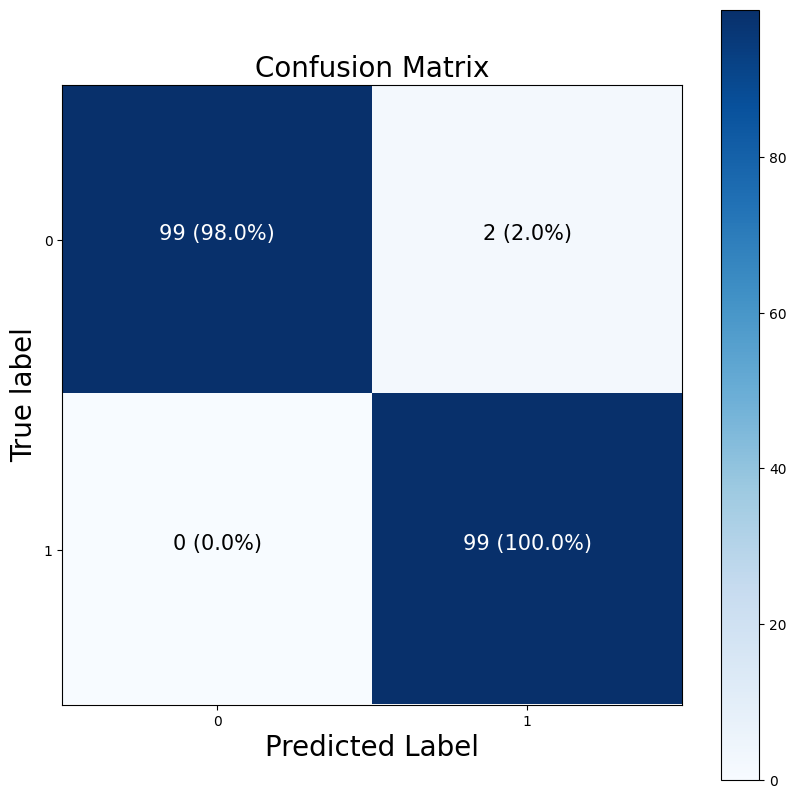

In [ ]:
from matplotlib.hatch import HorizontalHatch
import itertools

figsize = (10,10)

cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis label to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

treshold = (cm.max() + cm.min()) / 2

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i,j]>treshold else "black",
           size=15)

## Working with a larger example (multi-class classification)

When you have more then two classes as an option, it's known as **mutli-class classification**.

To practice multiclass classification we're gonna build a nn to classify images
of different items of clothing.


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

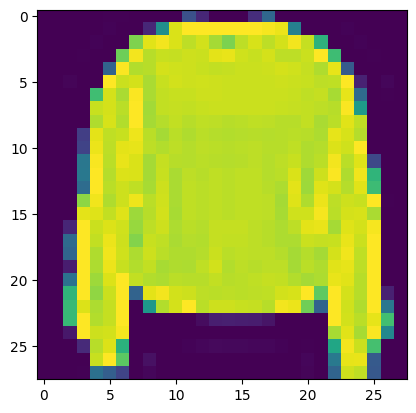

In [5]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [6]:
# Create a small list
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Pullover')

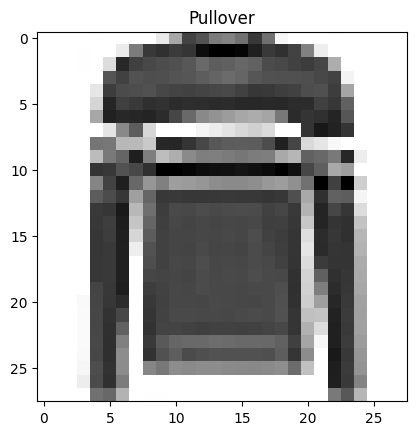

In [7]:
plt.imshow(train_data[5], cmap=plt.cm.binary)
plt.title(class_names[train_labels[5]])

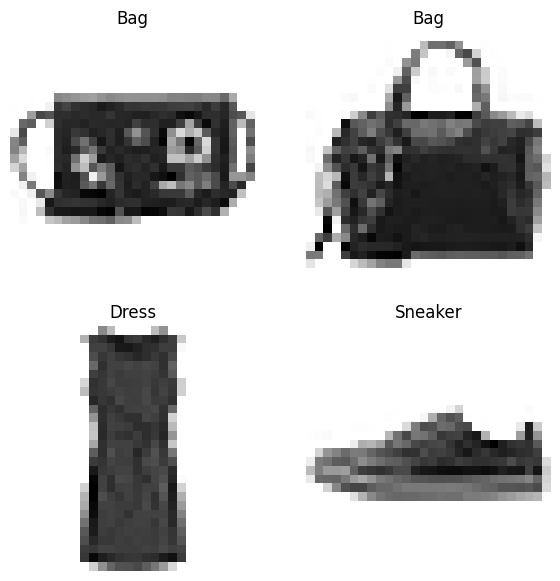

In [8]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

* input shape = 28x28
* output shape = 10
* softmax
* loss function

SparseCategoricalCrossentropy() for labels as Integers

CategoricalCrossentropy() for labels one-hot encoded

In [9]:
tf.one_hot(train_labels, depth=10)[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [10]:
train_labels[0]

9

In [11]:
tf.random.set_seed(42)

model_88 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_88.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
non_norm_history = model_88.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 18s 8ms/step - loss: 2.3872 - accuracy: 0.0988 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3037 - val_accuracy

In [12]:
# Check the model summary
model_88.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [15]:
tf.random.set_seed(42)

model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_norm.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

norm_history = model_norm.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=10,
                              validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1022 - accuracy: 0.5954 - val_loss: 0.7311 - val_accuracy: 0.7367
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6664 - accuracy: 0.7600 - val_loss: 0.6747 - val_accuracy: 0.7535
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6110 - accuracy: 0.7793 - val_loss: 0.6472 - val_accuracy: 0.7616
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5812 - accuracy: 0.7941 - val_loss: 0.6005 - val_accuracy: 0.7800
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5619 - accuracy: 0.8036 - val_loss: 0.5992 - val_accuracy: 0.7920
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5461 - accuracy: 0.8094 - val_loss: 0.6016 - val_accuracy: 0.7859
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5367 - accuracy: 0.8145 - val_loss: 0.5827 - val_accuracy:

> **NOTE**

NNs tend to prefer data in numerical form as well as normalized!!!

<Axes: title={'center': 'Normalized data'}>

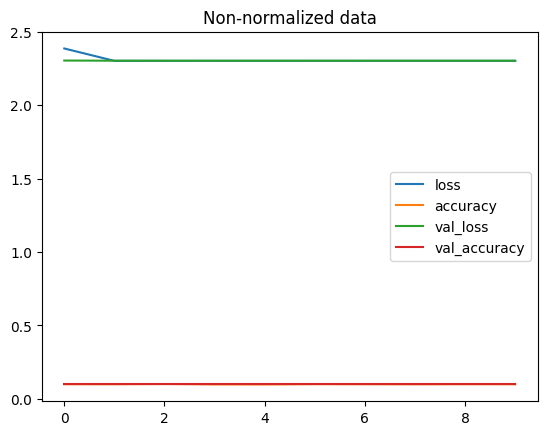

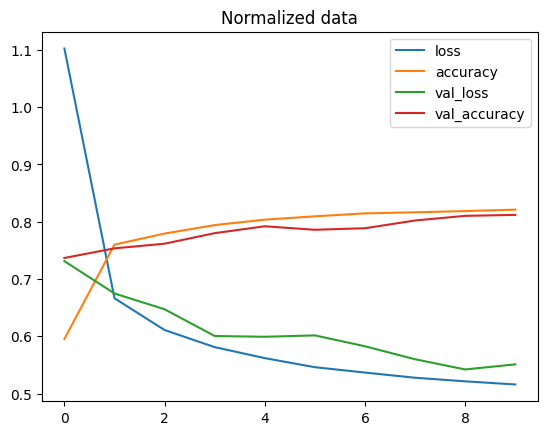

In [16]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

pd.DataFrame(norm_history.history).plot(title="Normalized data")

In [17]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

# Create the lr callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=40,
                              validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2780 - accuracy: 0.4963 - val_loss: 1.0026 - val_accuracy: 0.6400 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8980 - accuracy: 0.6777 - val_loss: 0.8623 - val_accuracy: 0.6833 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8084 - accuracy: 0.7042 - val_loss: 0.8095 - val_accuracy: 0.7069 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7702 - accuracy: 0.7144 - val_loss: 0.7901 - val_accuracy: 0.7103 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7488 - accuracy: 0.7212 - val_loss: 0.7639 - val_accuracy: 0.7261 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7296 - accuracy: 0.7309 - val_loss: 0.7419 - val_accuracy: 0.7197 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the best lr')

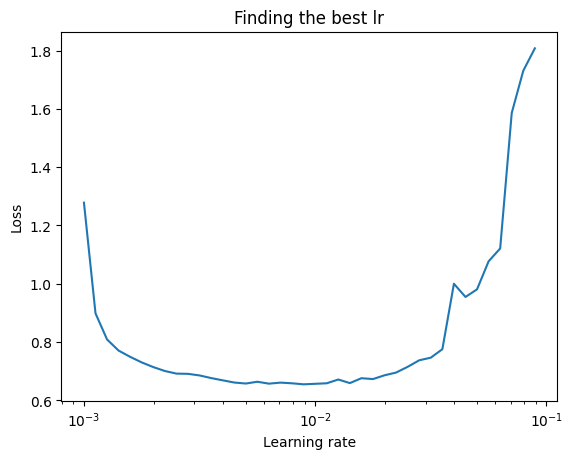

In [18]:
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the best lr")

In [19]:
tf.random.set_seed(42)

model_lasty = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_lasty.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=["accuracy"])

lasty_history = model_lasty.fit(train_data_norm, tf.one_hot(train_labels, depth=10), epochs=20,
                              validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2736 - accuracy: 0.4934 - val_loss: 0.9373 - val_accuracy: 0.6320
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8426 - accuracy: 0.6704 - val_loss: 0.7999 - val_accuracy: 0.7198
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7392 - accuracy: 0.7382 - val_loss: 0.7264 - val_accuracy: 0.7566
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6849 - accuracy: 0.7590 - val_loss: 0.6941 - val_accuracy: 0.7618
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6540 - accuracy: 0.7691 - val_loss: 0.6671 - val_accuracy: 0.7661
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6339 - accuracy: 0.7745 - val_loss: 0.6545 - val_accuracy: 0.7702
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6182 - accuracy: 0.7808 - val_loss: 0.6517 - val_accuracy:

## Evaluating our multi-class classification model

In [20]:
import itertools
from sklearn.metrics import confusion_matrix

from matplotlib.hatch import HorizontalHatch
import itertools

figsize = (10,10)

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis label to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  treshold = (cm.max() + cm.min()) / 2

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j]>treshold else "black",
            size=text_size)

In [21]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [22]:
# Predictions
y_probs = model_lasty.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[1.70736049e-12, 1.58574885e-14, 2.94706164e-20, 1.14940946e-08,
        7.57156229e-15, 5.54674447e-01, 1.83562401e-11, 6.60444945e-02,
        3.34069104e-04, 3.78946871e-01],
       [2.01783565e-04, 9.55490691e-07, 9.08784211e-01, 8.67288691e-05,
        5.64899631e-02, 1.15980789e-08, 3.43490355e-02, 2.22213469e-14,
        8.73033641e-05, 3.47462548e-20],
       [1.41697155e-05, 9.99975502e-01, 4.28248814e-09, 1.01862270e-05,
        1.49897275e-07, 2.47033113e-38, 5.36807820e-11, 0.00000000e+00,
        9.18569561e-12, 0.00000000e+00],
       [1.48082227e-05, 9.99833107e-01, 4.14585380e-11, 1.51956410e-04,
        5.16073797e-08, 2.23696543e-36, 6.22434049e-11, 0.00000000e+00,
        8.89363860e-11, 1.48388426e-35],
       [2.03063950e-01, 8.63284688e-04, 3.55310500e-01, 1.63273234e-02,
        2.54356861e-02, 1.57225266e-04, 3.97344321e-01, 1.94056113e-07,
        1.49738882e-03, 6.36712816e-09]], dtype=float32)

In [23]:
class_names[tf.argmax(y_probs[0])]

'Sandal'

In [24]:
tf.argmax(y_probs, axis=1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([5, 2, 1, ..., 8, 1, 5])>

In [25]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]



array([5, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [26]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

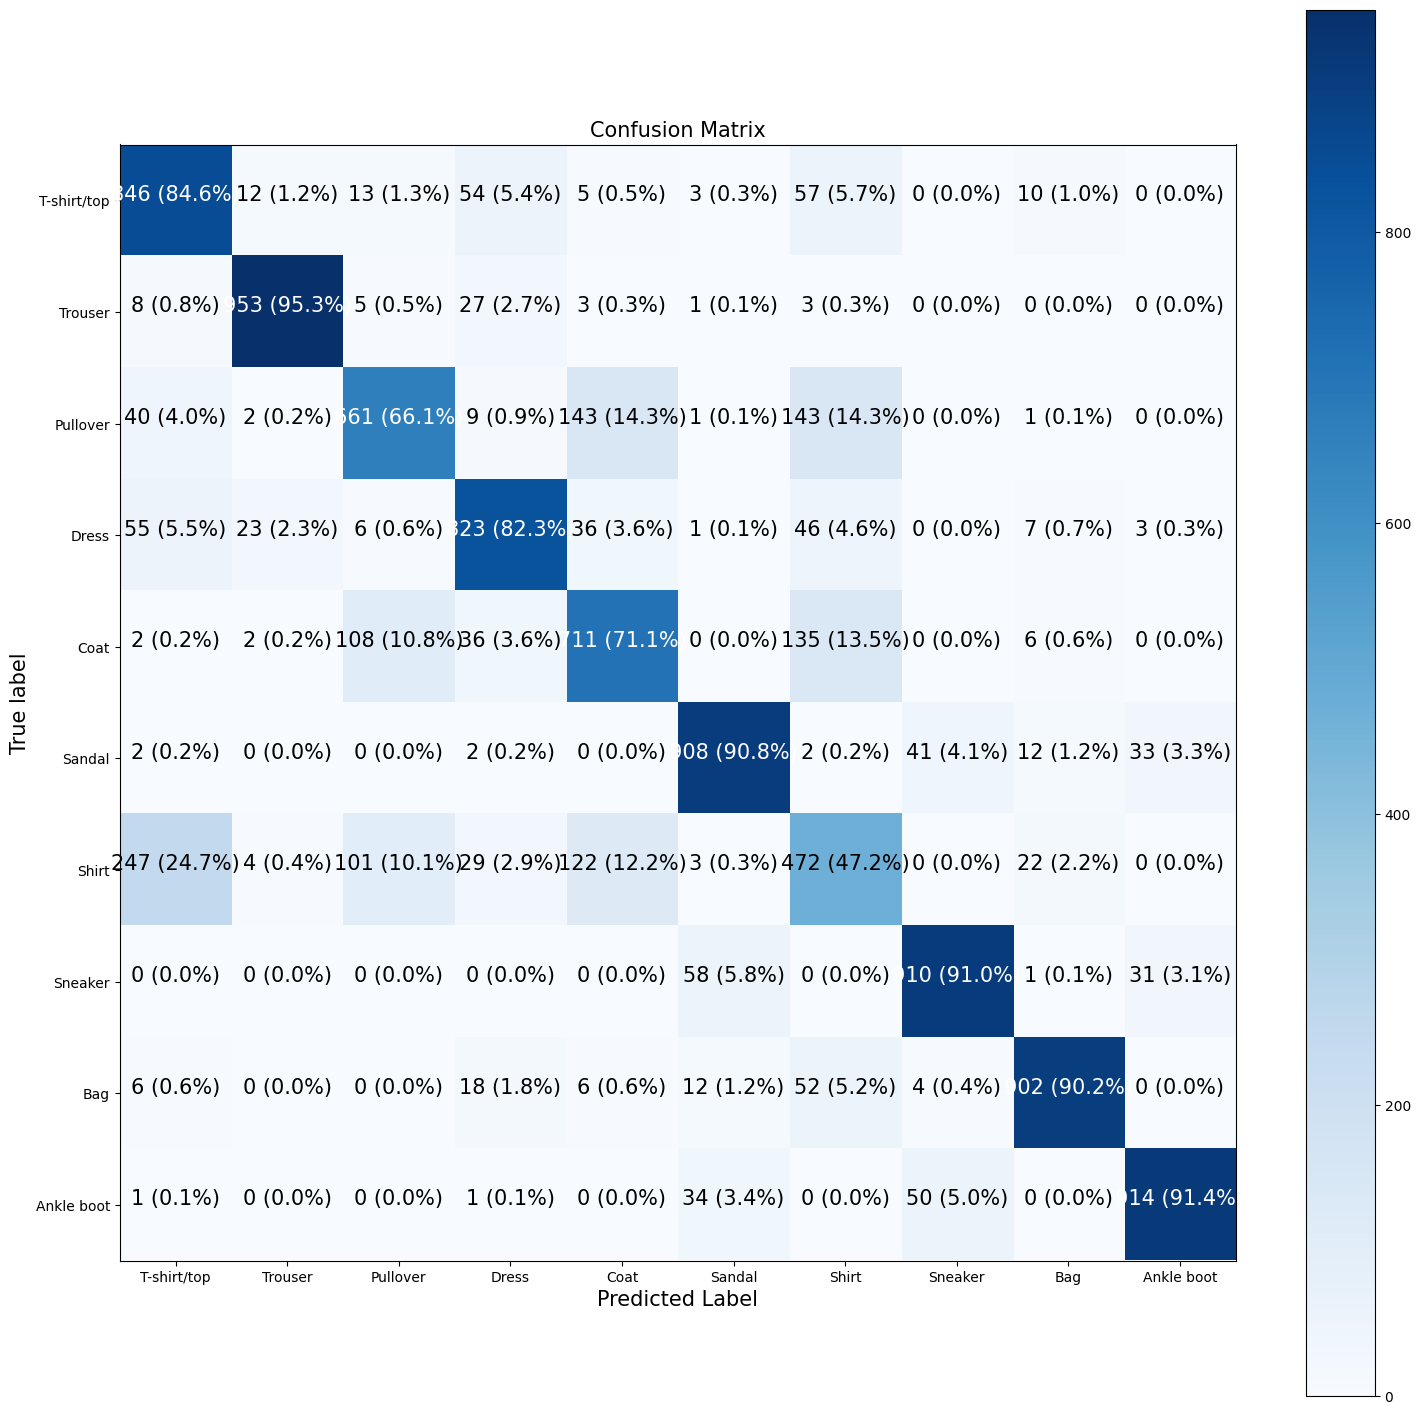

In [27]:
make_confusion_matrix(test_labels, y_preds, class_names,figsize=(18,18))

> **NOTE:**

Working with images, it's a good idea to visualize as much as you can to develop a further understanding of the data and the inputs and outputs of your model.

In [28]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if prediction is right or wrong
  if pred_label == true_label:
    color="green"
  else:
    color="red"

  # Add xlabel information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)



1/1 [==============================] - 0s 45ms/step


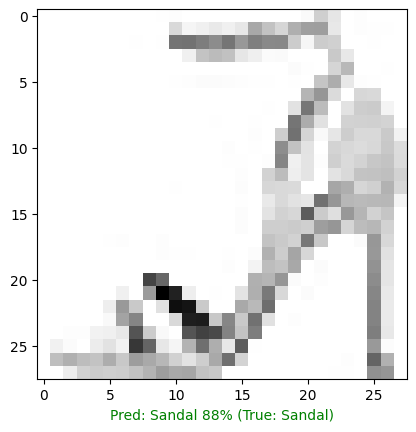

In [40]:
plot_random_image(model_lasty, test_data_norm, test_labels, class_names)

## What patters is our model learning?

In [30]:
# Find the layers of our most recent model
model_lasty.layers

In [31]:
# Extract a particular layer
model_lasty.layers[1]

In [32]:
# Get the patterns of a layer in our network
weights, biases = model_lasty.layers[2].get_weights()
weights, weights.shape

(array([[ 0.07579836,  1.3887421 ,  0.7176987 , -0.6496367 ],
        [-0.48329985,  0.7215984 ,  0.5492311 ,  1.4258318 ],
        [ 0.34056753, -0.62328935, -1.5244516 , -0.15298393],
        [ 1.5116181 , -0.23674124, -0.46650952,  0.72839445]],
       dtype=float32),
 (4, 4))

In [33]:
# Bias vector
biases, biases.shape

(array([1.5301288 , 0.8204845 , 0.26063368, 1.2631806 ], dtype=float32), (4,))

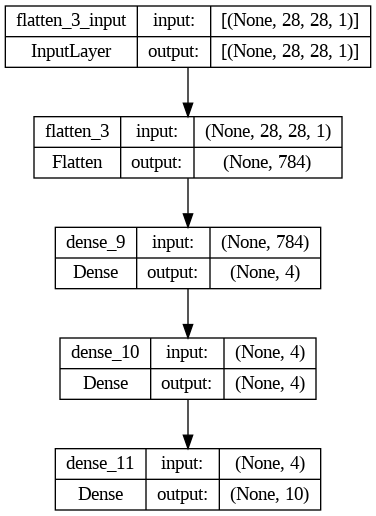

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model_lasty, show_shapes=True)